<a href="https://colab.research.google.com/github/steffyalbert/Programming_challenge/blob/main/task_kopernikus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Extracting data from google drive
#cd ./drive/MyDrive/sub_data
!tar -xvf  '/content/drive/MyDrive/ml-challenge.tar' -C '/content/'


c23/
c23/c23-1616689078329.png
c23/c23-1616689120916.png
c23/c23-1616689163591.png
c23/c23-1616689206068.png
c23/c23-1616689248543.png
c23/c23-1616689392406.png
c23/c23-1616689734969.png
c23/c23-1616690077367.png
c23/c23-1616690419647.png
c23/c23-1616690762047.png
c23/c23-1616691104851.png
c23/c23-1616691447373.png
c23/c23-1616691789971.png
c23/c23-1616692132577.png
c23/c23-1616692474975.png
c23/c23-1616692817457.png
c23/c23-1616693159859.png
c23/c23-1616693502261.png
c23/c23-1616693844587.png
c23/c23-1616694187388.png
c23/c23-1616694529994.png
c23/c23-1616694872510.png
c23/c23-1616695214951.png
c23/c23-1616695557277.png
c23/c23-1616695899479.png
c23/c23-1616696241920.png
c23/c23-1616696584520.png
c23/c23-1616696927083.png
c23/c23-1616697269599.png
c23/c23-1616697612042.png
c23/c23-1616697954482.png
c23/c23-1616698296964.png
c23/c23-1616698639412.png
c23/c23-1616698981729.png
c23/c23-1616699324009.png
c23/c23-1616699666493.png
c23/c23-1616700009093.png
c23/c23-1616700351574.png
c23/c23

In [3]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


import sys
sys.path.append('/content/')

import imaging_interview
from imaging_interview import compare_frames_change_detection
from imaging_interview import preprocess_image_change_detection

similar (nearby frames): 0
different: 544615.5
different: 26190.0
similar(only very slight difference): 23868.5


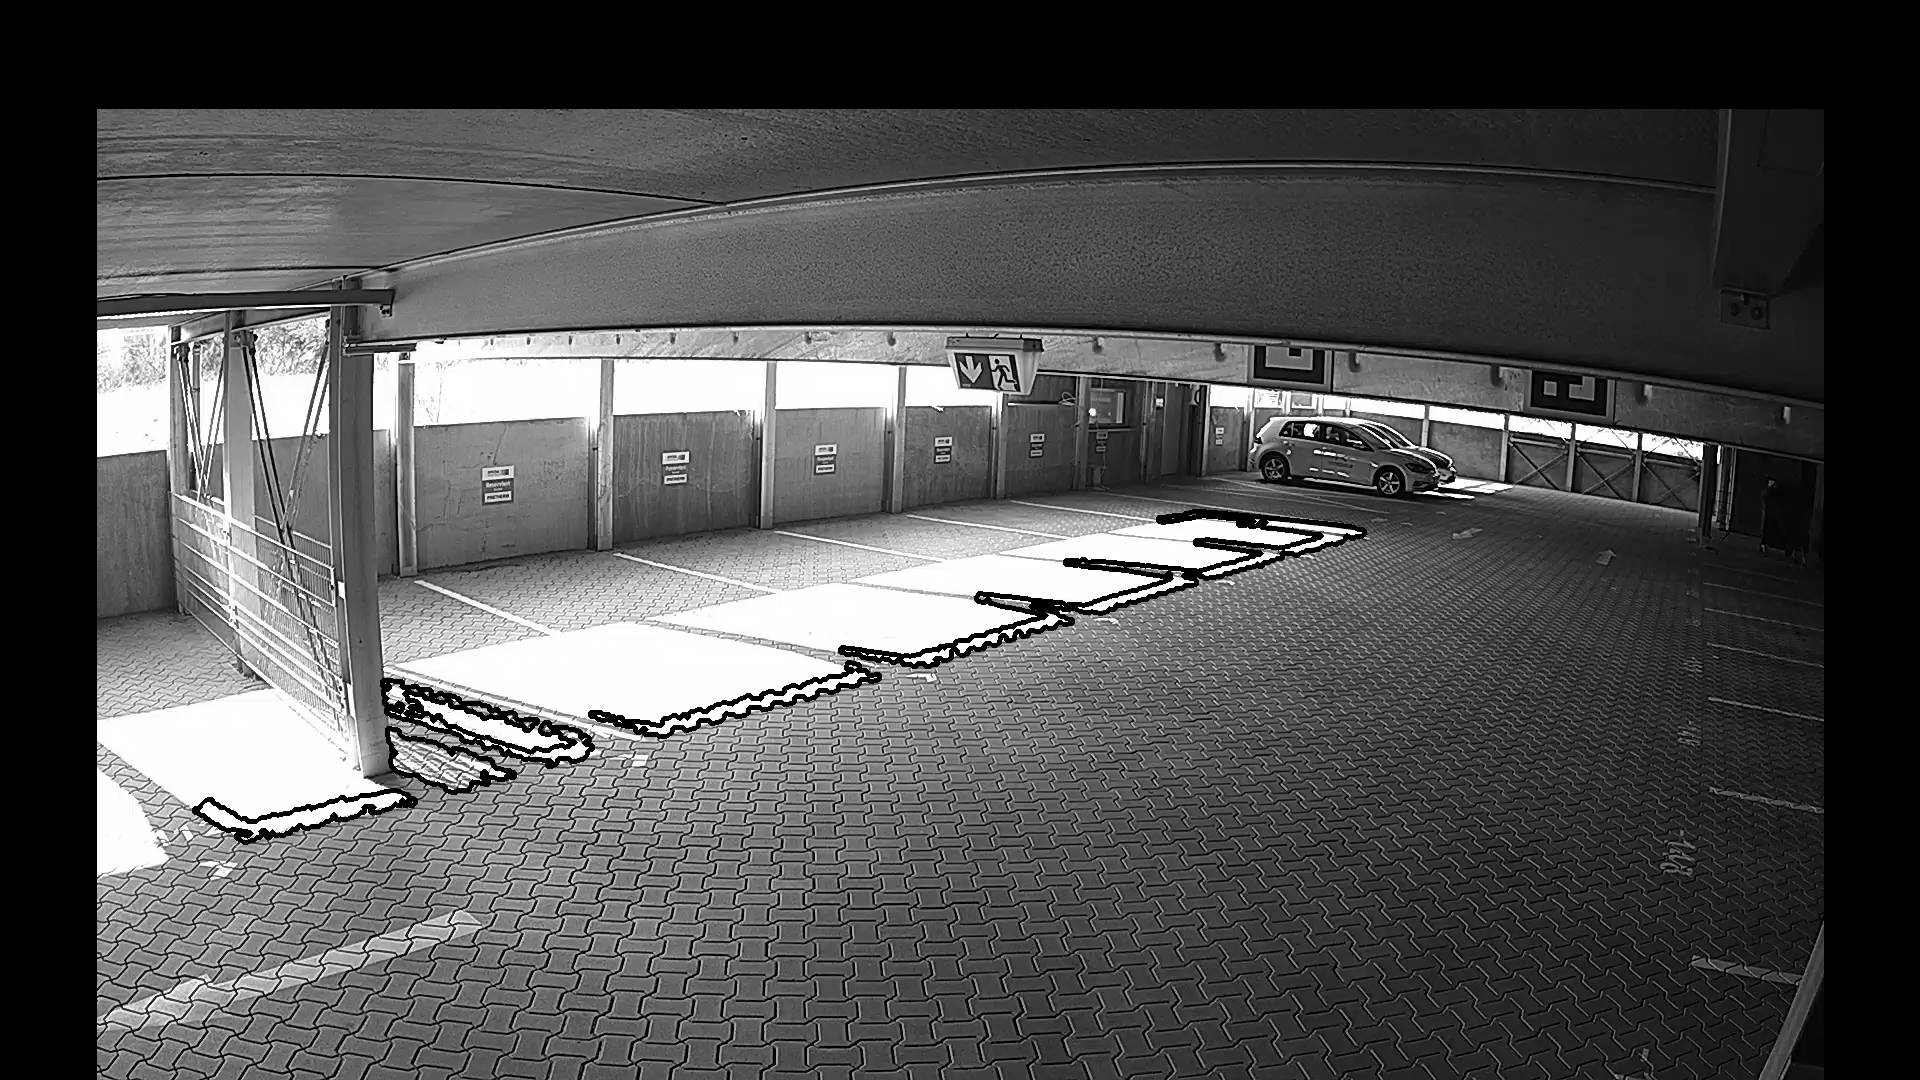

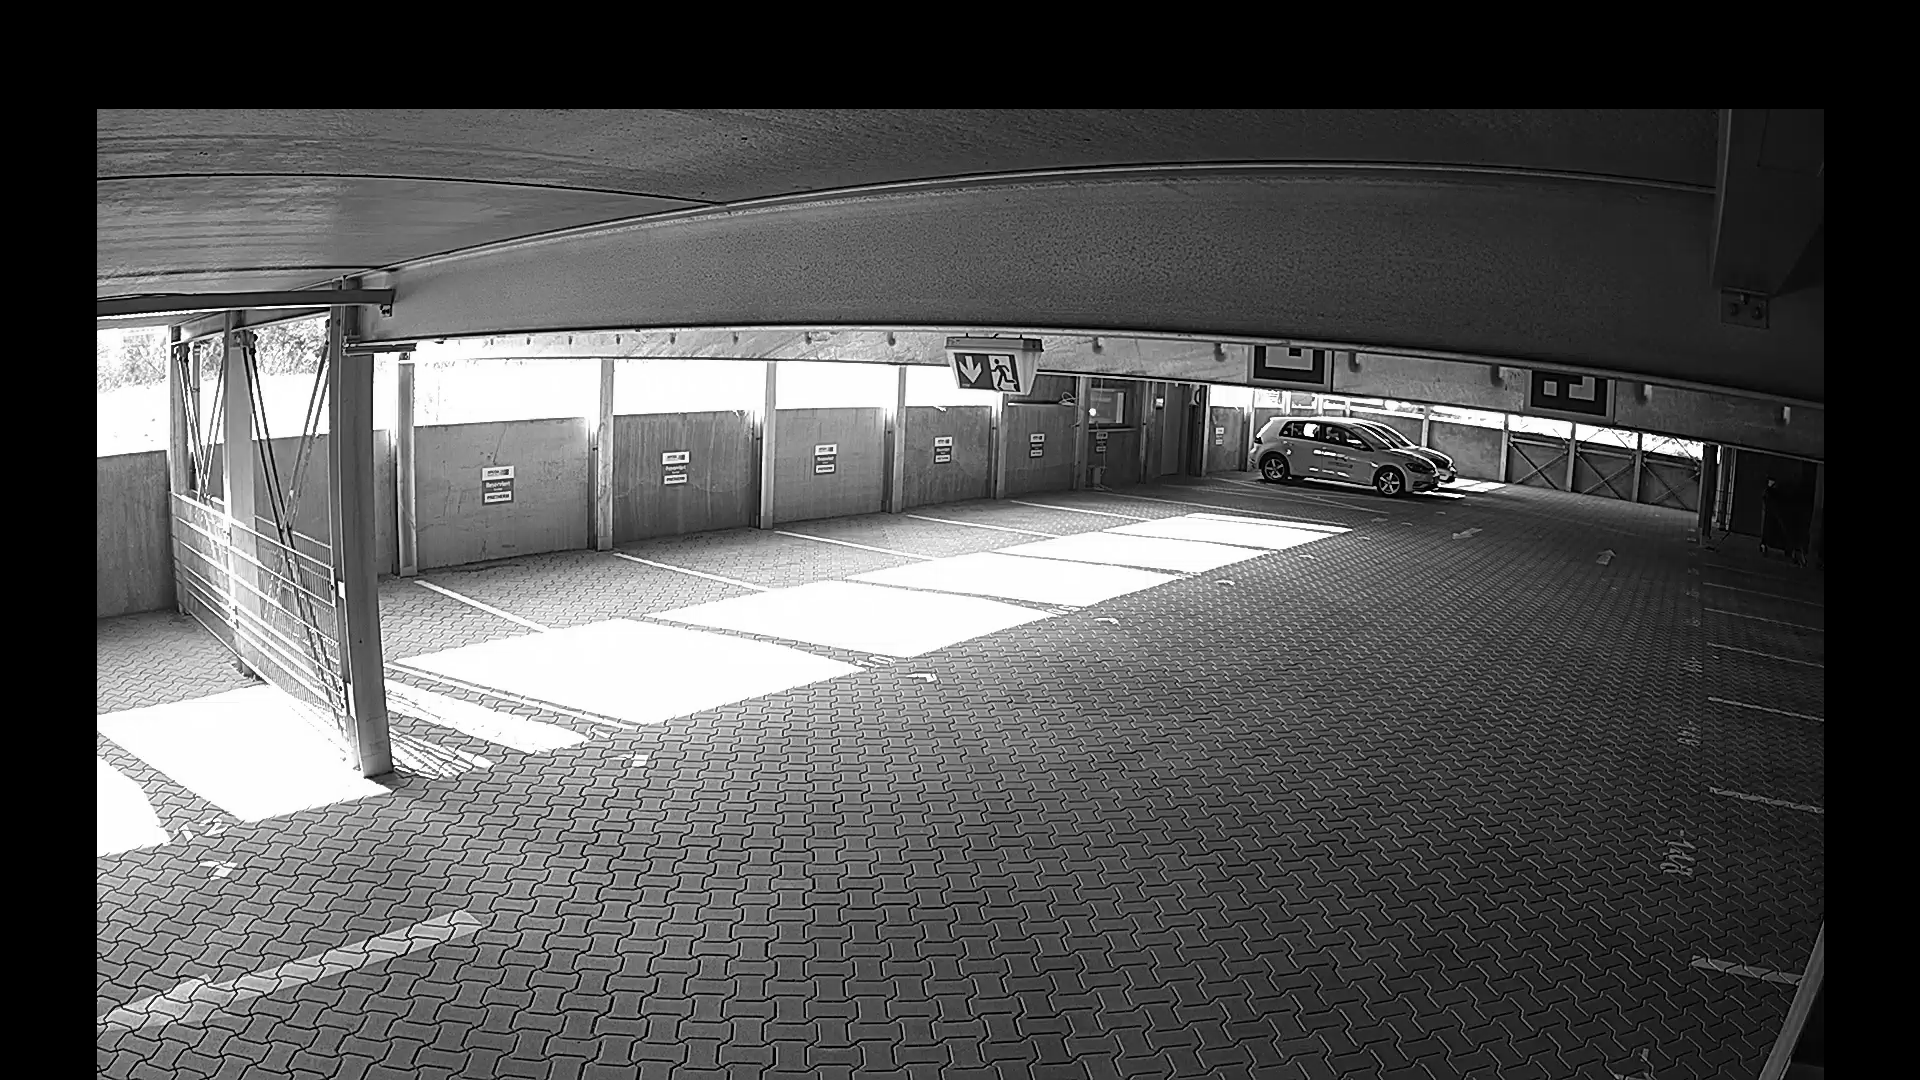

In [4]:
img1 = cv2.imread('/content/c23/c23-1616689078329.png')
img2 = cv2.imread('/content/c23/c23-1616689120916.png')
img3 = cv2.imread('/content/c23/c23-1616694872510.png')

img4=cv2.imread('/content/c23/c23-1616722930192.png')
img5=cv2.imread('/content/c23/c23-1617050734758.png')


img6=cv2.imread('/content/c23/c23-1616769851533.png')
img7=cv2.imread('/content/c23/c23-1616770194060.png')

img1=  preprocess_image_change_detection(img1)
img2=  preprocess_image_change_detection(img2)
img3=  preprocess_image_change_detection(img3)
img4=  preprocess_image_change_detection(img4)
img5=  preprocess_image_change_detection(img5)
img6=  preprocess_image_change_detection(img6)
img7=  preprocess_image_change_detection(img7)

score1, res_cnts, thresh1=compare_frames_change_detection(img1, img2, 3000)
score2, res_cnts, thresh2=compare_frames_change_detection(img1, img3, 3000)
score3, res_cnts, thresh3=compare_frames_change_detection(img4, img5, 3000)
score4, res_cnts, thresh4=compare_frames_change_detection(img6, img7, 3000)

print("similar (nearby frames):",score1)
print("different:",score2)
print("different:",score3)
print("similar(only very slight difference):",score4 )


cv2.drawContours(img7, res_cnts, -1, (0,255,0), 3)
cv2_imshow(img7)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2_imshow(img6)
cv2.waitKey(0)
cv2.destroyAllWindows()
#print(res_cnts)



In [ ]:
import os
dataset='/content/c23/'
for (i) in enumerate(os.listdir(dataset)):
  print(i)

In [ ]:
dataset1='/content/c23/'
#dataset2='/content/bwdir/'
print(len(dataset1))
#print(len(dataset2))
import glob
images1 = glob.glob(dataset1 + '/*.png')
#images2 = glob.glob(dataset2 + '/*.png')
print(len(images1))
#print(len(images2))

13
64


In [ ]:
im = cv2.imread('/content/c23/c23-1616689206068.png')
print(im.shape)
img=  preprocess_image_change_detection(im)
print(img.shape)

(1080, 1920, 3)
(1080, 1920)


In [6]:
import numpy as np
import shutil
import glob
import os
from os.path import join

def createPreprocessedImagesInTemp(original,temp):
    # create temp or delete existing temp
    if not os.path.exists(temp):
        os.makedirs(temp)
    else:
        shutil.rmtree(temp)
        os.makedirs(temp)
    # iterate through each image of the dataset
    for (j, fileName) in enumerate(os.listdir(original)):
        imagePath = join(original, fileName)
        image = cv2.imread(imagePath)
        if image is not None:
            # Draw mask for each image and convert it to gray scale using the given function.
            image=  preprocess_image_change_detection(image)
            cv2.imwrite(os.path.join(temp, fileName), image)

            # If needed resize the preprocessed image
            #resized_image = cv2.resize(image, (256, 256))
            # resized_image = np.array(resized_image)
            #cv2.imwrite(os.path.join(temp, fileName), resized_image)
    print("Preprocessed images are copied to temp folder")


In [7]:
def deleteSimilarImagesFromTemp(searchedImageName,temp):
        
    searchedImgPath = join(temp, searchedImageName)
    # iterate through all images in temp directory and compare it with searchedImageName
    for (j, compareImageName) in enumerate(os.listdir(temp)):
        # if search image is same as compared image then dont delete the compared image
        if compareImageName == searchedImageName:
            pass
        # if search image and compared image names are different, then calculate the score 
        else:
            compareImgPath = join(temp, compareImageName)
            try:
                searchedImgTemp = cv2.imread(searchedImgPath, cv2.IMREAD_GRAYSCALE)
                compareImgTemp = cv2.imread(compareImgPath, cv2.IMREAD_GRAYSCALE)
                # compute the contour area scores of both the images using the provided function with min_contourarea
                score,res_cnts, thresh=compare_frames_change_detection(searchedImgTemp, compareImgTemp,3000)
                                  
            except:
                continue

            # When contour area score is less than threshold, images are more similar
            if score < 65000:
                # From the temp directory delete the compared image
                os.remove(compareImgPath)
                print("Search image: "+searchedImageName+", removed: "+ compareImageName+" Score:"+ str(score))

#Use this for an O(n) search
def deleteSimilarImagesFromTempLinearly(tempDir):
        # Starting image 
        imageList = os.listdir(tempDir).sort()
        currentImageName = imageList[0]
        # iterate through all images in temp directory and compare it with searchedImageName 
        # skipping the first image
        for (j, nextImageName) in enumerate(imageList[1:]):
            # if search image and compared image names are different, then calculate the score 
            try:
                currentImagePath = join(tempDir, currentImageName)
                nextImagePath = join(tempDir, nextImageName)

                currentImage = cv2.imread(currentImagePath, cv2.IMREAD_GRAYSCALE)
                nextImage = cv2.imread(nextImagePath, cv2.IMREAD_GRAYSCALE)
                # compute the contour area scores of both the images using the provided function with min_contourarea
                score, res_cnts, thresh=compare_frames_change_detection(currentImage, nextImage, 2000)
                print("Search image: "+currentImageName+", compare image: "+ nextImageName+" Score:"+ str(score)) 
                             
            except BaseException as error:
                print('An exception occurred: {}'.format(error))

            # When contour area score is less than threshold images are more similar
            if score < 24000:
                # From the temp directory delete the compared image
                os.remove(nextImagePath)
            else:
                currentImageName = nextImageName

In [8]:
def main():
    dataPath = '/content/'  #path to image dataset folder
    origDataDir = join(dataPath,  "c23")
    # Create another directory to copy all the preprocessed images
    temp = join(dataPath,  "temp")
    #function to copy all preprocessed to another temp folder
    createPreprocessedImagesInTemp(origDataDir,temp)
    imagesBeforeCleaning = glob.glob(origDataDir + '/*.png')
   
    # deleteSimilarImagesFromTempLinearly(temp)  #USE THIS FOR O(n) SEARCH
    
    for (i, searchedImageName) in enumerate(os.listdir(origDataDir)):
        # Search for all similar images in temp folder when compared to searchedImageName
        deleteSimilarImagesFromTemp(searchedImageName,temp)
    
    # Iterate over original image directory
    # To clean original dir, compare the temp and original directory and remove files from original which are not present in temp
    tempFiles= os.listdir(temp)
    for img in os.listdir(origDataDir):
      if ((img not in tempFiles) and (img.endswith(".png"))):
        
        os.remove(os.path.join(origDataDir, img))

    imagesAfterCleaning = glob.glob(origDataDir + '/*.png')
    print("Images before cleaning ",len(imagesBeforeCleaning))
    print("Images after cleaning ",len(imagesAfterCleaning))
    delcount= len(imagesBeforeCleaning)-len(imagesAfterCleaning)
    print(" Images deleted ",delcount)

if __name__ == "__main__":
    main()

Preprocessed images are copied to temp folder
Search image: c23-1616834549526.png, removed: c23-1616833864410.png Score:0
Search image: c23-1616834549526.png, removed: c23-1616834206928.png Score:0
Search image: c23-1616834549526.png, removed: c23-1616832836562.png Score:3009.0
Search image: c23-1616834549526.png, removed: c23-1616833521886.png Score:0
Search image: c23-1616834549526.png, removed: c23-1616833179126.png Score:0
Search image: c23-1616834549526.png, removed: c23-1616834892048.png Score:0
Search image: c23-1616741411009.png, removed: c23-1616747235709.png Score:59788.5
Search image: c23-1616741411009.png, removed: c23-1616741753772.png Score:0
Search image: c23-1616741411009.png, removed: c23-1616745865346.png Score:33549.0
Search image: c23-1616741411009.png, removed: c23-1616739011999.png Score:9288.0
Search image: c23-1616741411009.png, removed: c23-1616746893069.png Score:16695.0
Search image: c23-1616741411009.png, removed: c23-1616740382406.png Score:0
Search image: 

**Finding similarity score using python ssim library**

In [48]:
from skimage.metrics import structural_similarity as compare_ssim

def deleteSimilarImagesFromTemp(searchedImageName,temp):
  
        searchedImgPath = join(temp, searchedImageName)
        # iterate through all images in temp directory and compare it with searchedImageName
        for (j, compareImageName) in enumerate(os.listdir(temp)):
            # if search image is same as compared image then don't delete the compared image
            if compareImageName == searchedImageName:
                pass
            # if search image and compared image names are different, then calculate the score 
            else:
                compareImgPath = join(temp, compareImageName)
                try:
                    searchedImgTemp = cv2.imread(searchedImgPath, cv2.IMREAD_GRAYSCALE)
                    compareImgTemp = cv2.imread(compareImgPath, cv2.IMREAD_GRAYSCALE)
                    # compute the contour area scores of both the images using the provided function with min_contourarea
                    (score, diff) = compare_ssim(searchedImgTemp, compareImgTemp, full=True)
                    print("Search image: "+searchedImageName+", compare image:: "+ compareImageName+" Score:"+ str(score))  
                                     
                except:
                    continue

                # When contour area score is less than threshold images are more similar
                if score < 0.65:
                    # From the temp directory delete the compared image
                    os.remove(compareImgPath)

def deleteSimilarImagesFromTempLinearly(tempDir):
        # Starting image 
        imageList = os.listdir(tempDir)
        imageList.sort()
        currentImageName = imageList[0]
        # iterate through all images in temp directory and compare it with searchedImageName 
        # skipping the first image
        for (j, nextImageName) in enumerate(imageList[1:]):
            # if search image and compared image names are different, then calculate the score 
            try:
                currentImagePath = join(tempDir, currentImageName)
                nextImagePath = join(tempDir, nextImageName)

                currentImage = cv2.imread(currentImagePath, cv2.IMREAD_GRAYSCALE)
                nextImage = cv2.imread(nextImagePath, cv2.IMREAD_GRAYSCALE)
                # compute the contour area scores of both the images using the provided function with min_contourarea
                (score, diff) = compare_ssim(currentImage, nextImage, full=True)
                print("Search image: "+currentImageName+", compare image: "+ nextImageName+" Score:"+ str(score))  
                             
            except BaseException as error:
                print('An exception occurred: {}'.format(error))

            # When contour area score is less than threshold images are more similar
            if score < 0.91:
                    # From the temp directory delete the compared image
                    os.remove(nextImagePath)
            else:
                    currentImageName = nextImageName
          

def main():
    dataPath = '/content/'  #path to image dataset folder
    origDataDir = join(dataPath,  "c23")
    # Create another directory to copy all the preprocessed images
    temp = join(dataPath,  "temp")
    #function to copy all preprocessed images to another temp folder
    createPreprocessedImagesInTemp(origDataDir,temp)
    
    imagesBeforeCleaning = glob.glob(origDataDir + '/*.png')
    deleteSimilarImagesFromTempLinearly(temp)  #Use this for an O(n) search
    #for (i, searchedImageName) in enumerate(os.listdir(origDataDir)):
        # Search for all similar images in temp folder when compared to searchedImageName
        #deleteSimilarImagesFromTemp(searchedImageName,temp)
    
    # Iterate over original image directory
    # To clean original dir, compare the temp and original directory and 
    # remove files from original which are not present in temp
    tempFiles= os.listdir(temp)
    for img in os.listdir(origDataDir):
      if ((img not in tempFiles) and (img.endswith(".png"))):
           os.remove(os.path.join(origDataDir, img))

    imagesAfterCleaning = glob.glob(origDataDir + '/*.png')
    print("Images before cleaning ",len(imagesBeforeCleaning))
    print("Images after cleaning ",len(imagesAfterCleaning))
    delcount= len(imagesBeforeCleaning)-len(imagesAfterCleaning)
    print(" Images deleted ",delcount)

if __name__ == "__main__":
    main()

Preprocessed images are copied to temp folder
Search image: c23-1616689078329.png, compare image: c23-1616689120916.png Score:0.9368953276924533
Search image: c23-1616689120916.png, compare image: c23-1616689163591.png Score:0.9371977814555137
Search image: c23-1616689163591.png, compare image: c23-1616689206068.png Score:0.9378144931590283
Search image: c23-1616689206068.png, compare image: c23-1616689248543.png Score:0.9372485026292754
Search image: c23-1616689248543.png, compare image: c23-1616689392406.png Score:0.9355700939971813
Search image: c23-1616689392406.png, compare image: c23-1616689734969.png Score:0.9309830245406628
Search image: c23-1616689734969.png, compare image: c23-1616690077367.png Score:0.9184081622522019
Search image: c23-1616690077367.png, compare image: c23-1616690419647.png Score:0.9288039382909636
Search image: c23-1616690419647.png, compare image: c23-1616690762047.png Score:0.9265684000814771
Search image: c23-1616690762047.png, compare image: c23-1616691

Download the cleaned folder as zip file

In [ ]:
import shutil
shutil.make_archive('/content/c23_contourarea2000_functh45', 'zip', '/content/c23')

'/content/c23_contourarea2000_functh45.zip'